In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import mysql.connector
import pandas as pd
from collections import Counter
from tqdm import tqdm
import seaborn as sns

/tmp/ipykernel_7316/2573209650.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

eda = mysql.connector.Connect(
    host = "database-1.c96mmei8egml.ap-northeast-2.rds.amazonaws.com",
    port = "3306",
    user = "eda_yc",
    password = "yc",
    database = "eda_project"
)
cursor = eda.cursor()

In [3]:
cursor.execute("""
               SELECT game.win, group_concat(tags.tag1)
               FROM match_data as game, champion_tags as tags
               WHERE game.championName = tags.championName
               Group By matchId, teamId""")
result = cursor.fetchall()
DF = pd.DataFrame(result)
DF[1] = DF[1].str.split(',')

In [4]:
Role_list = []
for idx in range(len(DF)) :
    counter = Counter(DF[1][idx])
    Role = [
        DF[0][idx],
        counter['Tank'],
        counter['Fighter'],
        counter['Assassin'],
        counter['Mage'],
        counter['Marksman'],
        counter['Support']]
    Role_list.append(Role)

In [5]:
Role = pd.DataFrame(Role_list)
Role.columns = ['win', 'Tank', 'Fighter', 'Assassin', 'Mage', 'Marksman', 'Support']

In [28]:
role_win_rate = []
each_role_win_rate = []

for j in tqdm(range(0,5)) :
    each_role_win_rate = []
    
    for each in Role :
        win = 0
        game = 0
        
        for i in range(len(Role)) :
            if Role[each][i] == j:
               game = game + 1
               win = win + Role['win'][i]
               
        if game > 0 : win_rate = win/game
        else : win_rate = 0

        each_role_win_rate.append(win_rate)

    role_win_rate.append(each_role_win_rate)

100%|██████████| 5/5 [00:10<00:00,  2.17s/it]


In [29]:
df_win = pd.DataFrame(role_win_rate)
df_win.drop(labels=0, axis=1, inplace=True)
df_win.columns=['Tank', 'Fighter', 'Assassin', 'Mage', 'Marksman', 'Support']
df_win = df_win.mul(100)

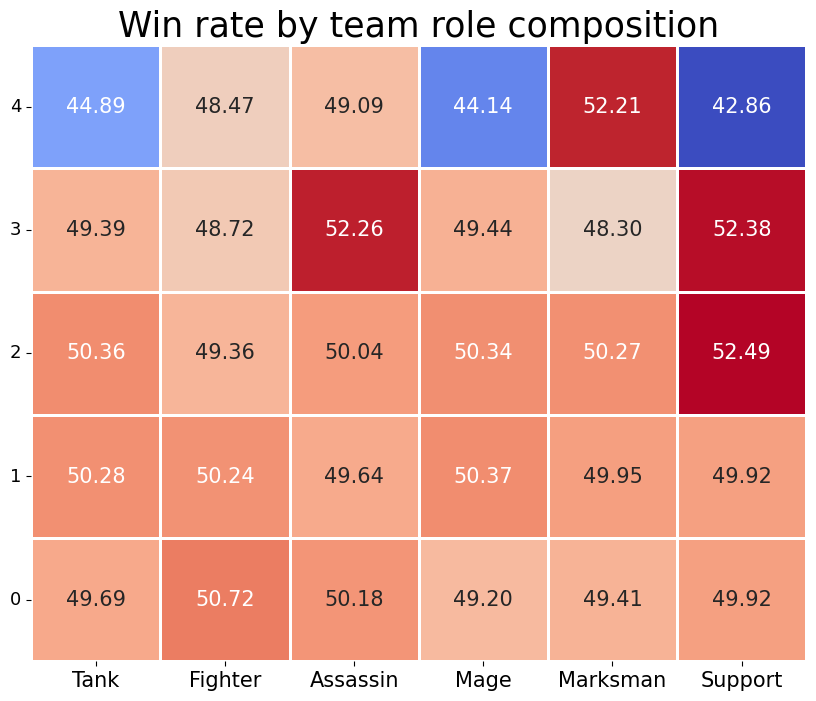

In [32]:

plt.figure(figsize = (10,8))
sns.heatmap(df_win, annot=True, linewidths=.8, cmap='coolwarm', fmt='.2f', annot_kws={"size":15}, cbar=False)
plt.autoscale()
plt.title('Win rate by team role composition', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(rotation=0, fontsize=13)
plt.gca().invert_yaxis()
plt.show()